In [2]:
# make neccesary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# load and create dataframe
data = pd.read_csv('survey_results_public.csv')
df = pd.DataFrame(data)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#which country pays the highest salary to developers?

In [18]:
avg_salary_by_country = df.groupby('Country')['Salary'].mean().sort_values(ascending=False)
print("Highest paying countries:\n", avg_salary_by_country.head())

Highest paying countries:
 Country
Virgin Islands (USA)           175000.0
Bermuda                        150000.0
U.S. Minor Outlying Islands    136000.0
Uganda                         120000.0
Kuwait                         115200.0
Name: Salary, dtype: float64


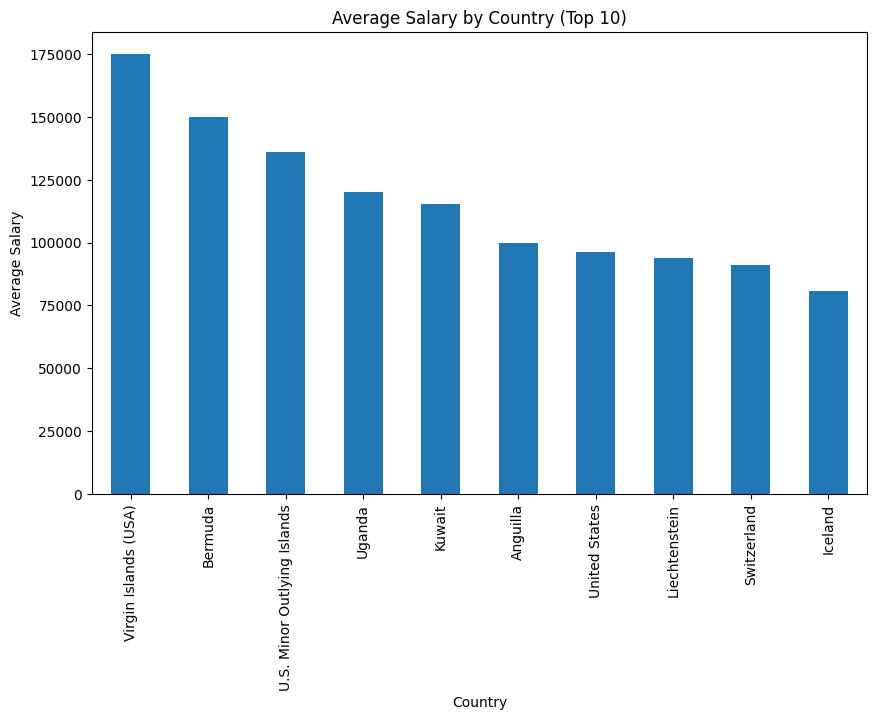

In [19]:
# plot the results
plt.figure(figsize=(10,6))
avg_salary_by_country.head(10).plot(kind='bar')
plt.title('Average Salary by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()

In [9]:
#which country has the highest job satisfaction rate among developers?

In [20]:
avg_job_satisfaction_by_country = df.groupby('Country')['JobSatisfaction'].mean().sort_values(ascending=False)
print("Highest job satisfaction countries:\n", avg_job_satisfaction_by_country.head())


Highest job satisfaction countries:
 Country
Libya       10.0
Macau       10.0
Angola       9.0
Yemen        9.0
Anguilla     9.0
Name: JobSatisfaction, dtype: float64


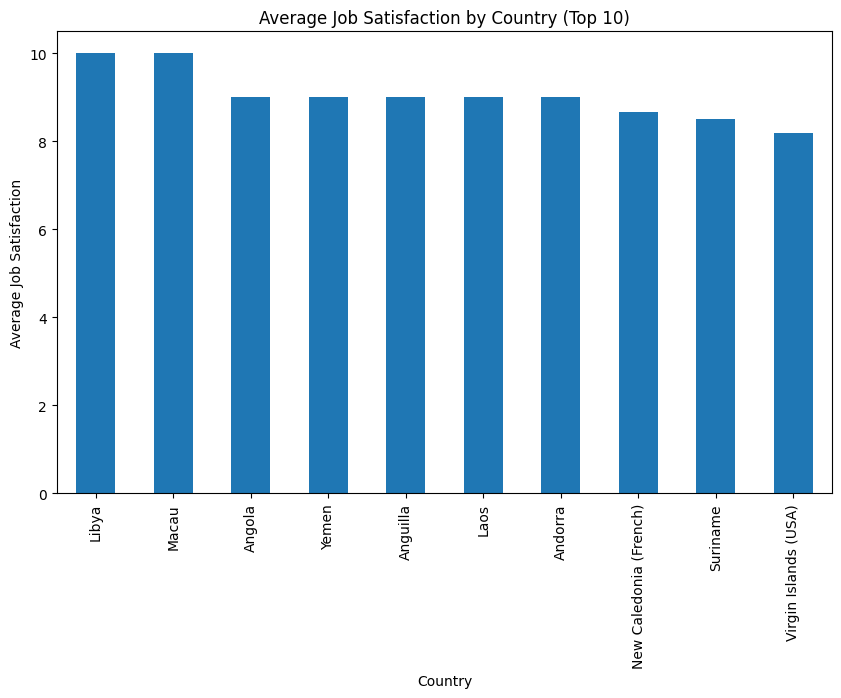

In [21]:
plt.figure(figsize=(10,6))
avg_job_satisfaction_by_country.head(10).plot(kind='bar')
plt.title('Average Job Satisfaction by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Job Satisfaction')
plt.show()


In [14]:
#Do people who code as hobby go for master?

In [22]:
hobby_coders = df[df['ProgramHobby'].str.contains('Yes, I program as a hobby')]
masters_education = hobby_coders['FormalEducation'].value_counts(normalize=True)['Master\'s degree']
print("Percentage of hobby coders with Master's degree:", round(masters_education * 100, 2))


Percentage of hobby coders with Master's degree: 20.58


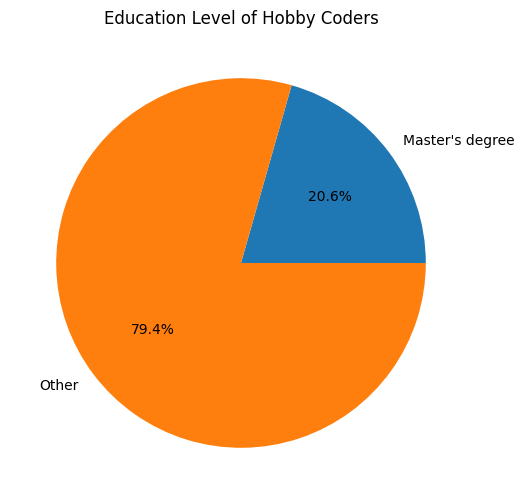

In [ ]:
plt.figure(figsize=(6,6))
labels = ['Master\'s degree', 'Other']
sizes = [masters_education, 1 - masters_education]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Education Level of Hobby Coders')
plt.show()